<a href="https://colab.research.google.com/github/benjaminjeremiah/AtbuChat/blob/master/regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [4]:
#rename columns

In [5]:
column_names = {
    'X1': 'Relative_Compactness','X2':'Surface_Area',
    'X3':'Wall_Area', 'X4':'Roof_Area','X5':'Overall_Height',
    'X6': 'Orientation', 'X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution',
    'Y1': 'Heating_Load', 'Y2':'Colling_Load'
}

In [6]:
df = df.rename(columns=column_names)
#select a sample of dataset
simple_linear_reg_df = df[Relative_Compactness, 'Cooling_Load'].sample(15, random_state = 1)


NameError: ignored

In [7]:
df.describe(include='all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Colling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


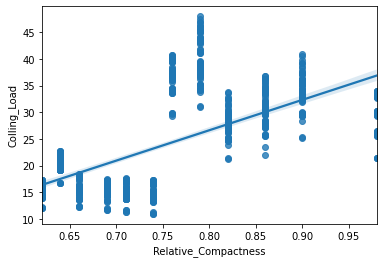

In [9]:
sns.regplot(x="Relative_Compactness", y="Colling_Load", data = df)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
nomalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = nomalised_df.drop(columns =['Heating_Load', 'Colling_Load'])
heating_target = nomalised_df['Heating_Load']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_model = LinearRegression()

In [19]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
predicted_values = linear_model.predict(x_test)

In [21]:
#MAE

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mae = mean_absolute_error(y_test, predicted_values)

In [24]:
round(mae, 3)

0.063

In [25]:
import numpy as np

In [27]:
rss = np.sum(np.square(y_test - predicted_values))

In [29]:
round(rss, 3)

1.823

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

In [34]:
round(rmse, 3)

0.089

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score = r2_score(y_test, predicted_values)

In [37]:
round(r2_score, 3)

0.893

In [38]:
#working with ridge
from sklearn.linear_model import Ridge

In [39]:
ridge_reg = Ridge(alpha=0.5)

In [40]:
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_reg = Lasso(alpha=0.001)

In [43]:
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
#comparing the effects of regulirization

In [62]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df
  linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
  ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
  lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
  final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
  final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
  final_weights.describe(include='all')